In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pandas.api.types import is_string_dtype, is_numeric_dtype
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("Automobile_data.csv")

In [3]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [4]:
#df.tail(5)

In [5]:
#df.info()

In [6]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [7]:
# finding the marked missing values
df = pd.read_csv("Automobile_data.csv", na_values="?")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [8]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
## remove column taht are 90% emty

emty_column= len(df)*.1
df.dropna(thresh=emty_column, axis=1, inplace= True)

In [10]:
df_1=df.copy()

In [11]:
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [12]:
# Extract all string-type columns
cols_str = []
for col in df:
    if is_string_dtype(df[col]):
        cols_str.append(col)
print(cols_str)

['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


In [13]:
# convert following columns to continuous variables based on data description
# normalized-losses, bore, stroke, horsepower, peak-rpm, price
cols = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='raise')

In [14]:
#make all string type variables to categorical variables.
for col in df:
    if is_string_dtype(df[col]):
        df[col] = df[col].astype('category').cat.as_ordered()

In [15]:
#Handle missing values:
for col in df:
    if is_numeric_dtype(df[col]):
        col_vals = df[col]
        if sum(col_vals.isnull()) != 0:
            df[col+'_na'] = col_vals.isnull()
            df[col] = col_vals.fillna(col_vals.median())

In [16]:
#Convert categorical variables to their numberic representations.
for col in df:
    if str(df[col].dtype) == "category":
        df[col] = df[col].cat.codes + 1

In [17]:
df.shape

(205, 32)

In [18]:
df.isnull().sum()

symboling               0
normalized-losses       0
make                    0
fuel-type               0
aspiration              0
num-of-doors            0
body-style              0
drive-wheels            0
engine-location         0
wheel-base              0
length                  0
width                   0
height                  0
curb-weight             0
engine-type             0
num-of-cylinders        0
engine-size             0
fuel-system             0
bore                    0
stroke                  0
compression-ratio       0
horsepower              0
peak-rpm                0
city-mpg                0
highway-mpg             0
price                   0
normalized-losses_na    0
bore_na                 0
stroke_na               0
horsepower_na           0
peak-rpm_na             0
price_na                0
dtype: int64

Text(0.5,0,'Risk rating')

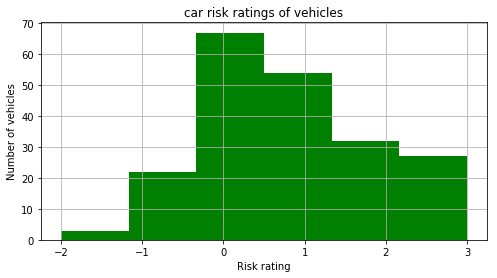

In [19]:
df.symboling.hist(figsize=(8,4),bins=6,color='green')
plt.title("car risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating')

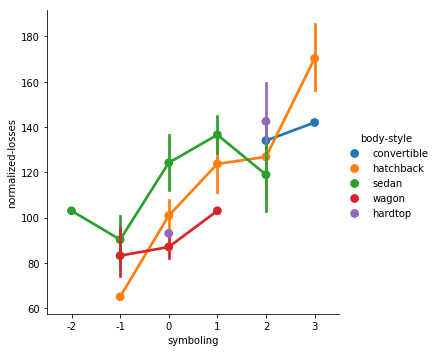

In [20]:
import seaborn as sns
sns.catplot(data=df_1, y="normalized-losses", x="symboling" , hue='body-style' ,kind="point")

In [21]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [22]:
X = df.drop("symboling", axis=1)
y = df["symboling"].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

In [23]:
rc = RidgeClassifier()
scores = []
for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)
    rc.fit(X_train, y_train)
    scores.append(f1_score(y_test, rc.predict(X_test), average='micro') )
    

np.mean(scores)*100

60.97560975609755

In [24]:
pred= rc.predict(X_test)

In [25]:
from sklearn.preprocessing import QuantileTransformer

In [26]:
qt = QuantileTransformer(output_distribution="normal")
scores = []

for _ in range(100):
    Xt,Xs,Yt,Ys = train_test_split(X, y, test_size=0.2)
    
    # apply QuantileTransform
    Xt = qt.fit_transform(Xt)
    Xs = qt.transform(Xs)
    
    rc.fit(Xt, Yt)
    scores.append(f1_score(Ys, rc.predict(Xs), average='micro'))

np.mean(scores)*100

63.02439024390244

In [27]:
pred= rc.predict(Xs)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_features=0.5)

In [29]:
Xt,Xs,Yt,Ys = train_test_split(X, y, test_size=0.2)
rfc.fit(Xt, Yt)
feat_scores = rfc.feature_importances_

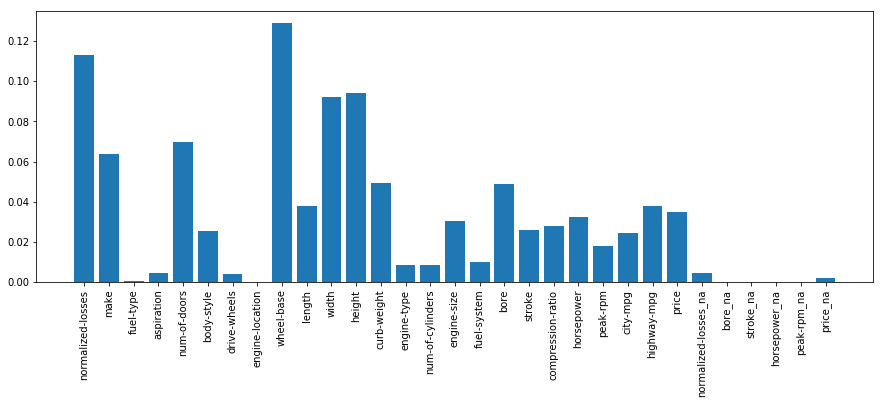

In [30]:
plt.rcParams['figure.figsize'] = [15,5]

plt.bar(range(len(feat_scores)), feat_scores)
plt.xticks(range(len(feat_scores)), Xt.columns, rotation=90)
plt.show()

In [31]:
good_features = np.where(feat_scores > 0.04)[0]
for i in good_features:
    print(X.columns[i])

X_small = X.iloc[:, good_features]

rc = RidgeClassifier()
scores = []
for _ in range(100):
    Xt,Xs,Yt,Ys = train_test_split(X_small, y, test_size=0.2)
    rc.fit(Xt, Yt)
    scores.append(f1_score(Ys, rc.predict(Xs), average='micro'))

np.mean(scores)*100

normalized-losses
make
num-of-doors
wheel-base
width
height
curb-weight
bore


56.024390243902445

In [32]:
from sklearn.feature_selection import SelectFromModel

In [33]:
from sklearn.pipeline import Pipeline

model = Pipeline([
  ('feature_selection', SelectFromModel(RandomForestClassifier())),
  ('classification', RidgeClassifier())
])

scores = []
for _ in range(100):
    Xt,Xs,Yt,Ys = train_test_split(X, y, test_size=0.2)
    model.fit(Xt, Yt)
    scores.append(f1_score(Ys, model.predict(Xs), average='micro'))
    
np.mean(scores)*100

57.04878048780488

# 2B feature Extraction

In [34]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [35]:
categories = [
    'alt.atheism', 'talk.religion.misc',
               'comp.graphics', 'sci.space'

]
newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True, 
categories=categories, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', shuffle=True, 
categories=categories, random_state=42)

In [36]:
vectorizer = HashingVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.fit_transform(newsgroups_test.data)

Y_train = newsgroups_train.target
Y_test = newsgroups_test.target
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

rf = RandomForestClassifier(n_jobs=-1, n_estimators=100)
rf.fit(X_train, Y_train)
pred = rf.predict(X_test)

(2034, 1048576)
(2034,)
(1353, 1048576)
(1353,)


In [37]:
score = metrics.accuracy_score(Y_test, pred)
print("accuracy: {:.2f}".format(score))

accuracy: 0.82


In [38]:
pred[:5]

array([2, 1, 1, 1, 1], dtype=int64)